In [153]:
# Project for prediction of bike renting based on environmental condition 
# importing libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
# reading csv file 
bike_data = pd.read_csv("day.csv")
############################################     

In [154]:
# # # 2.1 Exploratory Data Analysis # # # 
############################################ 
################################### 
# 2.1.1 understanding the data # 
################################### 
#Checking few observation of dataset 
bike_data.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [155]:
# looking at information of dataset
bike_data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.6+ KB


In [156]:
numeric_columns = ['temp','atemp','hum','windspeed','casual','registered','cnt'] 
cat_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit'] 

In [157]:
# looking at five point summary for our numerical variables 
bike_data[numeric_columns].describe() 

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [158]:
# unique values of categories variables 
bike_data[cat_columns].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [159]:
# counting of each unique values in each categorical variable 
print("value counts of categorical column") 
print() 
for i in cat_columns: 
    print(i) 
    print(bike_data[i].value_counts()) 
    print("=================================") 
    ################################### 

value counts of categorical column

season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
yr
1    366
0    365
Name: yr, dtype: int64
mnth
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
holiday
0    710
1     21
Name: holiday, dtype: int64
weekday
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
workingday
1    500
0    231
Name: workingday, dtype: int64
weathersit
1    463
2    247
3     21
Name: weathersit, dtype: int64


In [160]:
# 2.1.2 Missing value analysis # 
################################### 
# checking for missing values in dataset 
bike_data.isnull().sum()
################################### 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [161]:
# 2.1.3 outlier analysis # 
################################### 
# user defined function that will plot boxplot and histogram for four columns 
def hist_and_box_plot(col1, col2, col3, col4, data, bin1=30, bin2=30, bin3=30, bin4 = 30, sup =""): 
    fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize= (14,6)) 
    super_title = fig.suptitle("Boxplot and Histogram: "+sup,fontsize='x-large') 
    plt.tight_layout() 
    sns.boxplot(y = col1, data = data, ax = ax[0][0]) 
    sns.boxplot(y = col2,data = data, ax = ax[0][1]) 
    sns.boxplot(y = col3, data = data, ax = ax[0][2]) 
    sns.boxplot(y = col4, data = data, ax = ax[0][3]) 
    sns.distplot(data[col1], ax = ax[1][0], bins = bin1) 
    sns.distplot(data[col2], ax = ax[1][1], bins = bin2) 
    sns.distplot(data[col3], ax = ax[1][2], bins = bin3) 
    sns.distplot(data[col4], ax = ax[1][3], bins = bin4) 
    fig.subplots_adjust(top = 0.90)
    plt.show() 

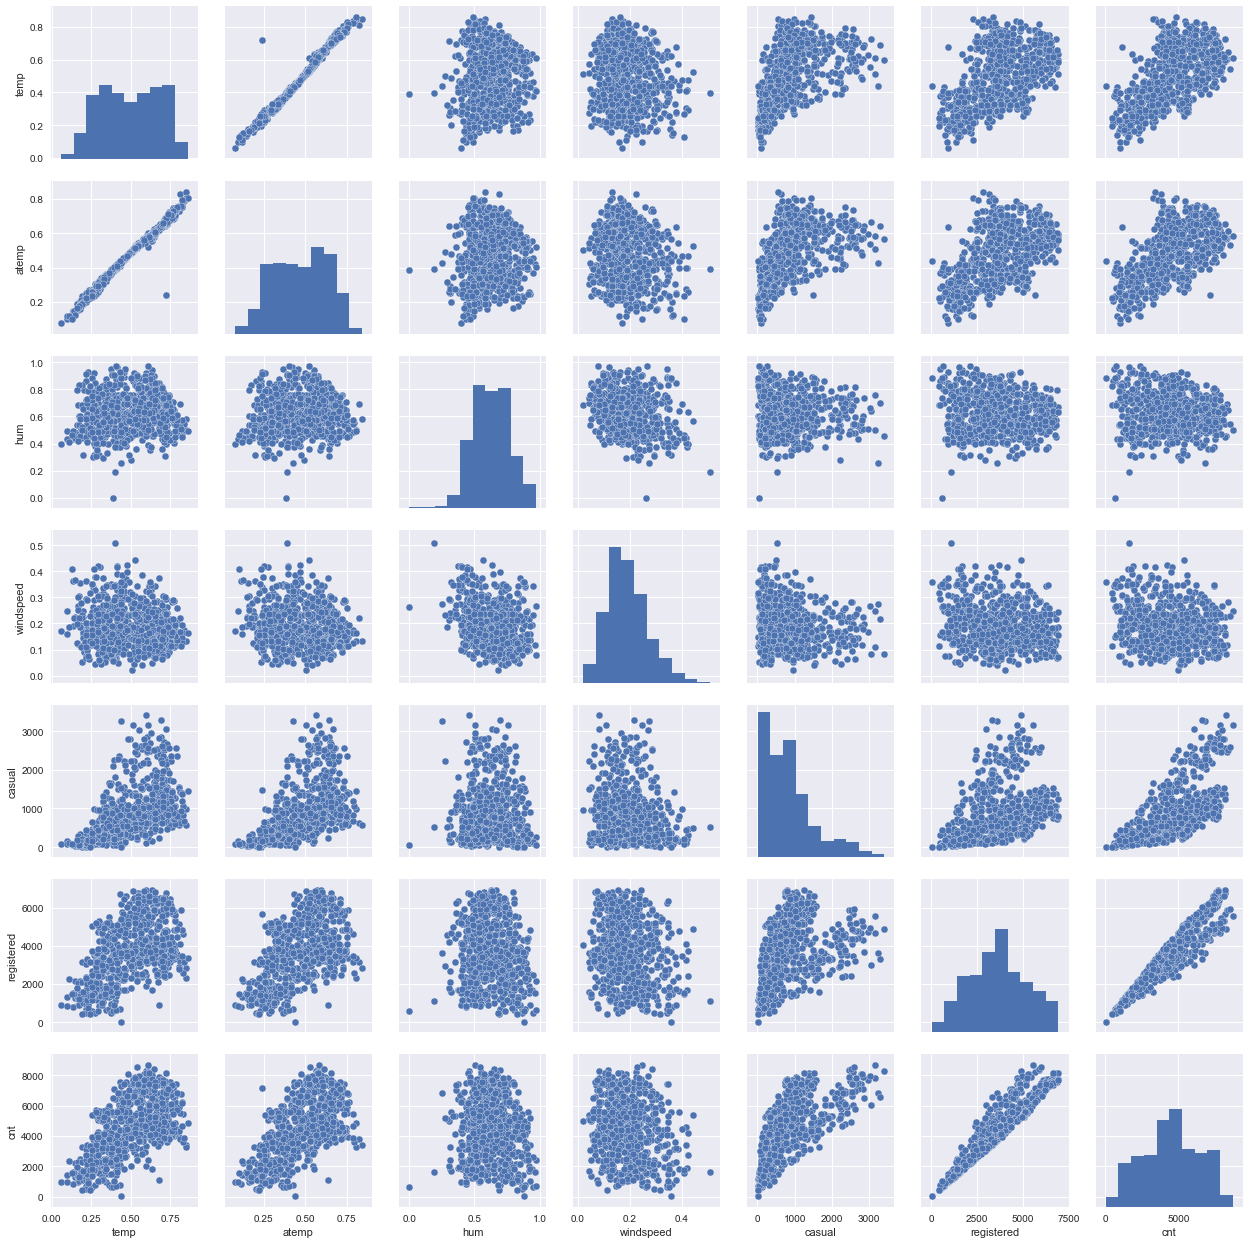

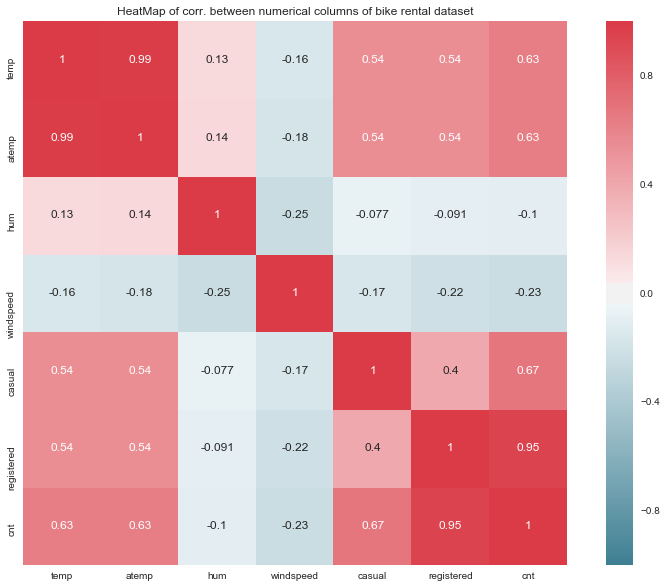

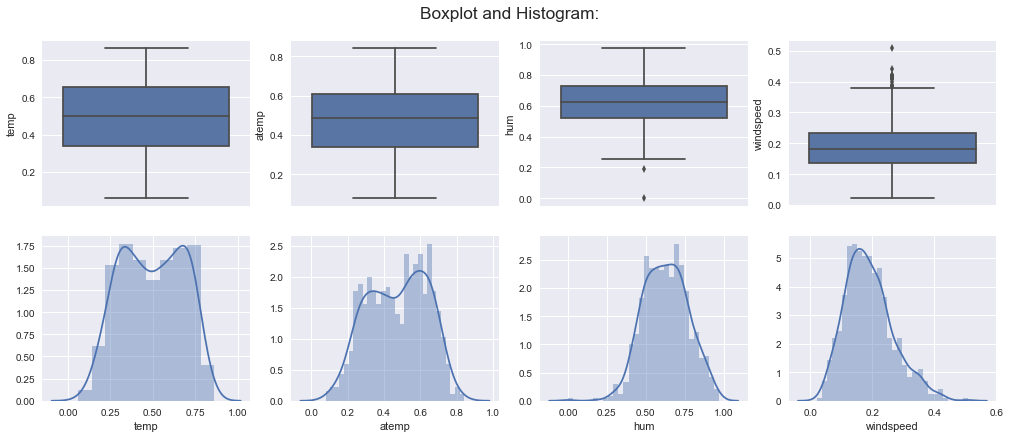

In [162]:
# plotting boxplot and histogram for our numerical variables 
hist_and_box_plot('temp', 'atemp', 'hum', 'windspeed', bin1 = 10, data = bike_data) 

In [163]:
################################### # 2.1.4 Feature Engineering # ################################### -> see output 
# user defined function to plot bar plot of a column for each y i.e. y1 and y2 wrt 
# unique variables of each x i.e. x1 and x2 
# X1 and X2 would be categorical variable, y1 and y2 would be continuous 
# this funciton will plot barplot for y1 column for each unique values of x1 and 
# willbarplot for y2 for each unique values of x2 and method could be mean,sum etc. 
def plot_bar(x1, y1,x2, y2, method = 'sum'): 
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (12,4), squeeze=False) 
    super_title = fig.suptitle("Bar Plot ", fontsize='x-large') 
    if(method == 'mean'): 
        gp = bike_data.groupby(by = x1).mean() 
        gp2 = bike_data.groupby(by = x2).mean() 
    else: 
        gp = bike_data.groupby(by = x1).sum()
        gp2 = bike_data.groupby(by = x2).sum() 
    gp = gp.reset_index() 
    gp2 = gp2.reset_index() 
    sns.barplot(x= x1, y = y1, data = gp, ax=ax[0][0]) 
    sns.barplot(x= x2, y = y2, data = gp2, ax=ax[0][1]) 
    fig.subplots_adjust(top = 0.90) 
    plt.show()

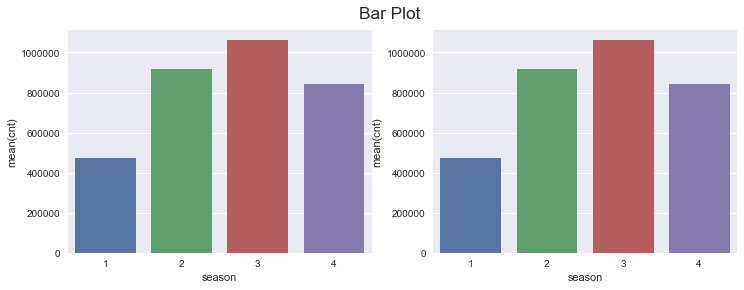

In [164]:
plot_bar('season','cnt', 'season', 'cnt')

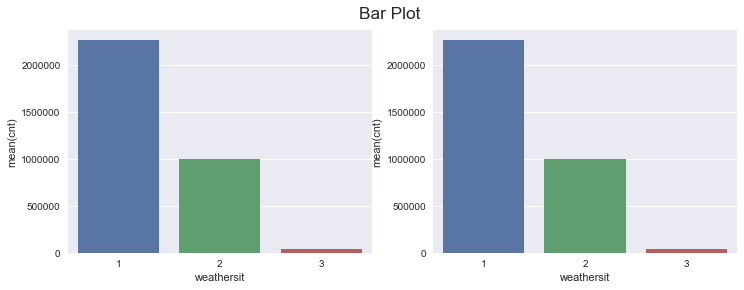

In [165]:
plot_bar('weathersit','cnt','weathersit','cnt')

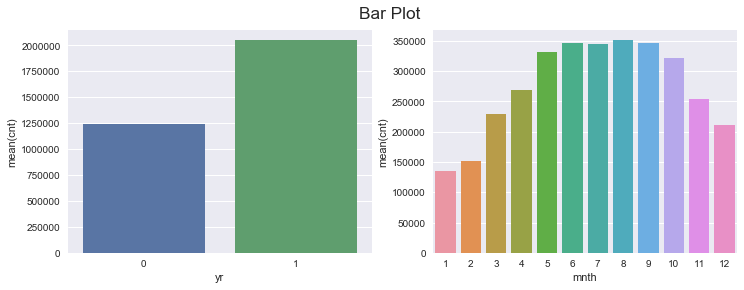

In [166]:
# plotting barplot for count i.e. cnt wrt to yr and month 
plot_bar('yr', 'cnt', 'mnth', 'cnt') 

In [167]:
#plotting barplot for count wrt month for each year
gp = bike_data.groupby(by = ['yr', 'mnth']).sum().reset_index() 
sns.factorplot(x= 'mnth', y = 'cnt', data = gp, col = 'yr', kind = 'bar')

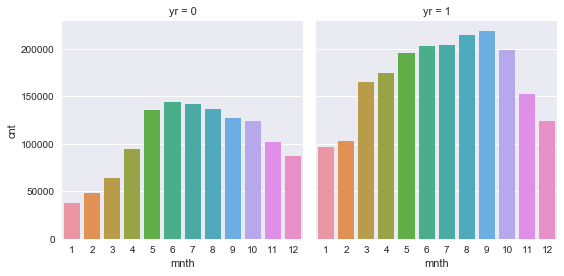

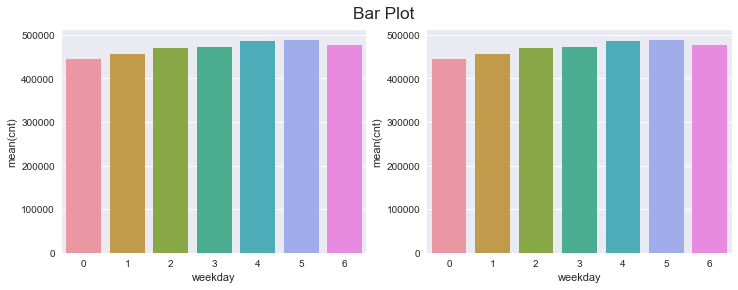

In [168]:
# ploting barplot for counting wrt weekday  
plot_bar('weekday', 'cnt', 'weekday', 'cnt') 

In [169]:
# defining function for making bins in mnth and weekday 
def feat_month(row): 
    if row['mnth'] <= 4 or row['mnth'] >=11: 
        return(0) 
    else: 
        return(1) 
def feat_weekday(row): 
    if row['weekday'] < 2: 
        return(0) 
    else: 
        return(1) 
bike_data['month_feat'] = bike_data.apply(lambda row : feat_month(row), axis=1) 
bike_data = bike_data.drop(['mnth'], axis=1) 
bike_data['week_feat'] = bike_data.apply(lambda row : feat_weekday(row), axis=1) 
bike_data = bike_data.drop(['weekday'], axis=1)

In [170]:
################################### # 2.1.5 Feature Selection # ################################### 
# let us look at correlation plot for each numerical variables 
sns.pairplot(bike_data[numeric_columns]) 

In [171]:
# let us look at heat map for each numerical variable
# with correlation 
fig = plt.figure(figsize = (14,10)) 
corr = bike_data[numeric_columns].corr()
sn_plt=sns.heatmap(corr,mask = np.zeros_like(corr, dtype = np.bool),square=True, 
            annot= True, cmap = sns.diverging_palette(220, 10, as_cmap= True)) 
plt.title("HeatMap of corr. between numerical columns of bike rental dataset") 
fg = sn_plt.get_figure() 
fg.savefig('heatmap.png')

In [132]:
# chi-square test for each categorical variable 
cat_columns=['season','yr','month_feat','holiday','week_feat','workingday', 'weathersit']
# making every combination from cat_columns 
factors_paired = [(i,j) for i in cat_columns for j in cat_columns]
# doing chi-square test for every combination 
p_values = [] 
from scipy.stats import chi2_contingency 
for factor in factors_paired: 
    if factor[0] != factor[1]: 
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_data[factor[0]], bike_data[factor[1]])) 
        p_values.append(p.round(3)) 
    else: 
        p_values.append('-') 
p_values = np.array(p_values).reshape((7,7)) 
p_values = pd.DataFrame(p_values, index=cat_columns, columns=cat_columns) 
print(p_values)

           season     yr month_feat holiday week_feat workingday weathersit
season          -    1.0        0.0   0.683     0.985      0.887      0.021
yr            1.0      -      0.971   0.995     0.954       0.98      0.127
month_feat    0.0  0.971          -   0.359     0.972      0.657      0.362
holiday     0.683  0.995      0.359       -       0.0        0.0      0.601
week_feat   0.985  0.954      0.972     0.0         -        0.0      0.227
workingday  0.887   0.98      0.657     0.0       0.0          -      0.254
weathersit  0.021  0.127      0.362   0.601     0.227      0.254          -


In [133]:
#checking importance of feature 
drop_col = ['cnt', 'instant','dteday', 'registered', 'casual'] 
from sklearn.ensemble import ExtraTreesRegressor 
reg = ExtraTreesRegressor(n_estimators=200) 
X = bike_data.drop(drop_col, axis =1) 
y = bike_data['cnt'] 
reg.fit(X, y) 
imp_feat = pd.DataFrame({'Feature': bike_data.drop(drop_col, axis =1).columns, 'importance':reg.feature_importances_}) 
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,yr,0.314583
1,atemp,0.161357
2,temp,0.148721
3,month_feat,0.125623
4,season,0.102417
5,weathersit,0.058109
6,hum,0.035561
7,windspeed,0.023024
8,workingday,0.013793
9,week_feat,0.010846


In [134]:
# checking vif of numerical column withhout dropping multicollinear column
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf 
from statsmodels.tools.tools import add_constant 
numeric_df = add_constant(bike_data[['temp', 'atemp', 'hum', 'windspeed']]) 
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], index = numeric_df.columns) 
vif.round(1)

const        45.6
temp         63.0
atemp        63.6
hum           1.1
windspeed     1.1
dtype: float64

In [135]:
# Checking VIF values of numeric columns after dropping column atemp 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf 
from statsmodels.tools.tools import add_constant 
numeric_df = add_constant(bike_data[['temp', 'hum', 'windspeed']]) 
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], 
                index = numeric_df.columns) 
vif.round(1) 

const        41.1
temp          1.0
hum           1.1
windspeed     1.1
dtype: float64

In [136]:
# Making dummies for each category session and weather 
season_dm = pd.get_dummies(bike_data['season'],drop_first=True, prefix='season') 
bike_data = pd.concat([bike_data, season_dm],axis=1) 
bike_data = bike_data.drop(['season'], axis=1) 
weather_dm = pd.get_dummies(bike_data['weathersit'], prefix= 'weather', drop_first=True)
bike_data = pd.concat([bike_data, weather_dm],axis=1) 
bike_data = bike_data.drop(['weathersit'], axis=1) 

In [137]:
################################### # 2.1.7 Data after EDA #  ################################### 
# creating another dataset with dropping outliers i.e.bike_data_wo
bike_data_wo = bike_data.copy() 

In [138]:
# dropping outliers from boxplot method 
for i in ['windspeed', 'hum']: 
    q75, q25 = np.percentile(bike_data_wo.loc[:,i], [75 ,25]) 
    iqr = q75 - q25 
    min = q25 - (iqr*1.5) 
    max = q75 + (iqr*1.5) 
    bike_data_wo=bike_data_wo.drop(bike_data_wo[bike_data_wo.loc[:,i]<min].index) 
    bike_data_wo=bike_data_wo.drop(bike_data_wo[bike_data_wo.loc[:,i]>max].index) 
    

In [139]:
# dropping unwanted columns from both dataset bike_data and bike_data_wo 
bike_data.drop(['instant', 'dteday', 'holiday', 'atemp', 'casual', 'registered'], axis=1, inplace=True) 
bike_data_wo.drop(['instant', 'dteday', 'holiday', 'atemp', 'casual', 'registered'], axis=1, inplace=True)  

bike_data.head() 
bike_data_wo.head() 

print('shape of original dataset',bike_data.shape) 
print('shape of dataset after removing outliers', bike_data_wo.shape)

shape of original dataset (731, 13)
shape of dataset after removing outliers (717, 13)


In [147]:
############################################ # # # # # 2.2.2 Building models # # # # # ############################################ 
# making a function which will build model on training set and would show result 
# for k-fold cv explained_variance_score and also show result for training & test 
from sklearn.metrics import explained_variance_score 
from sklearn.model_selection import cross_val_score 
def fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test): 
    regressor.fit(X_train, y_train) 
    y_pred = regressor.predict(X_test) 
    ten_performances = cross_val_score(estimator=regressor,X=X_train, y=y_train, cv = 10,scoring='explained_variance') 
    k_fold_performance = ten_performances.mean() 
    print("K-fold (K = 10) explained variance")
    print("================================") 
    print(k_fold_performance) 
    print() 
    print("on train data explained variance") 
    print("================================") 
    print(regressor.score(X_train, y_train)) 
    print() 
    print("on test data explained variance") 
    print("================================") 
    print(regressor.score(X_test, y_test)) 

In [148]:
# splitting dataset in train and test for whole dataset after eda i.e.bike_data 
X = bike_data.drop(['cnt'], axis=1) 
y = bike_data['cnt']
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [149]:
# splitting dataset in train and test for dataset without outlier i.e. bike_data_wo 
X = bike_data_wo.drop(['cnt'], axis=1) 
y = bike_data_wo['cnt'] 
from sklearn.model_selection import train_test_split 
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X,y,test_size=0.2, random_state = 0) 

In [150]:
######################### # Linear Regression # ######################### 
# building model for dataset bike_data 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)

ValueError: 'explained_variance' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

In [144]:
# building model for dataset bike_data_wo i.e. without outliers  
regressor = LinearRegression() 
fit_predict_show_performance(regressor, X_train_wo, y_train_wo, X_test_wo,y_test_wo)

ValueError: 'explained_variance' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

In [82]:
######################### # KNN # ######################### 
# building model for dataset bike_data 
from sklearn.neighbors import KNeighborsRegressor 
regressor = KNeighborsRegressor(n_neighbors=5) 
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test) 

ValueError: 'explained_variance' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

In [83]:
# building model for dataset bike_data_wo i.e. without outliers
regressor = KNeighborsRegressor(n_neighbors=5) 
fit_predict_show_performance(regressor,X_train_wo,y_train_wo,X_test_wo,y_test_wo)

ValueError: 'explained_variance' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

In [81]:
######################### # SVM # ######################### # building model for dataset bike_data
from sklearn.svm import SVR 
regressor = SVR() 
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test) 

NameError: name 'fit_predict_show_performance' is not defined

In [82]:
# building model for dataset bike_data_wo i.e. without outliers 
regressor = SVR() 
fit_predict_show_performance(regressor,X_train_wo,y_train_wo,X_test_wo,y_test_wo) 

NameError: name 'fit_predict_show_performance' is not defined

In [ ]:
############################# # Decision Tree Regression # ############################# 
# building model for dataset bike_data 
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=1) 
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test) 

In [ ]:
# building model for dataset bike_data_wo i.e. without outliers 
fit_predict_show_performance(regressor,X_train_wo,y_train_wo,X_test_wo,y_test_wo)

In [ ]:
######################### 
# Random Forest # 
######################### 
# building model for dataset bike_data 
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(random_state=1) 
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test) 

In [ ]:
# building model for dataset bike_data_wo i.e. without outliers 
regressor = RandomForestRegressor(random_state=1) 
fit_predict_show_performance(regressor,X_train_wo,y_train_wo,X_test_wo,y_test_wo) 

In [ ]:
######################### 
# XGBRegressor # 
######################### 
# building model for dataset bike_data
from xgboost import XGBRegressor regressor = XGBRegressor(random_state=1) 
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)

In [ ]:
# building model for dataset bike_data_wo i.e. without outliers 
regressor = XGBRegressor(random_state=1) 
fit_predict_show_performance(regressor,X_train_wo,y_train_wo,X_test_wo,y_test_wo)

In [ ]:
############################################ # # # # # Hyperparameter tuning # # # # # ############################################ 
############################################### # # # tuning Random Forest for bike_data dataset # # # ############################################### 
from sklearn.model_selection import GridSearchCV
# Random Forest hyperparameter tuning 
regressor = RandomForestRegressor(random_state=1) 
params = [{'n_estimators' : [500, 600, 800],'max_features':['auto','sqrt','log2'], 'min_samples_split':[2,4,6],'max_depth':[12, 14, 16], 'min_samples_leaf':[2,3,5],'random_state' :[1]}] 
grid_search = GridSearchCV(estimator=regressor, param_grid=params,cv = 5, scoring = 'explained_variance', n_jobs=-1) 
grid_search = grid_search.fit(X_train, y_train) 
print(grid_search.best_params_) 

In [ ]:
# building Ranodm Forest on tuned parameter 
regressor = RandomForestRegressor(random_state=1, max_depth=14, n_estimators=600, max_features='auto', min_samples_leaf=2, min_samples_split=2) 
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test) 

In [ ]:
############################################### # # 
# tuning XGBRegressor for bike_data dataset # 
# # ############################################### 
regressor = XGBRegressor(random_state=1) 
params = [{'n_estimators' : [250, 300,350, 400,450], 'max_depth':[2, 3, 5], 'learning_rate':[0.01, 0.045, 0.05, 0.055, 0.1, 0.3], 'gamma':[0, 0.001, 0.01, 0.03],'subsample':[1, 0.7, 0.8, 0.9], 'random_state' :[1]}] 
grid_search = GridSearchCV(estimator=regressor, param_grid=params,cv = 5, scoring = 'explained_variance', n_jobs=-1) 
grid_search = grid_search.fit(X_train, y_train) 
print(grid_search.best_params_) 

In [ ]:
# Building XGBRegressor on tuned parameter 
regressor = XGBRegressor(random_state=1, learning_rate=0.05, max_depth=3, n_estimators=300,gamma = 0, subsample=0.8) 
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)
############################################### # # 

In [ ]:
# plotting scatter graph for y_true and y_pred for tuned XGBRegressor model 
regressor = XGBRegressor(random_state=1, learning_rate=0.05, max_depth=3, n_estimators=300, gamma = 0, subsample=0.8) 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test) 
fig, ax = plt.subplots(figsize=(7,5)) 
ax.scatter(y_test, y_pred) 
ax.plot([0,8000],[0,8000], 'r--', label='Perfect Prediction') 
ax.legend() 
plt.title("scatter Graph between y_true and y_pred") 
plt.xlabel("y_true") 
plt.ylabel("y_pred") 
plt.tight_layout() 
plt.show()